# Load Module

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# module for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# module for decision tree visualization
import graphviz
from sklearn import tree

%matplotlib inline

# Load Data

In [2]:
# parse_dates for datetime type
df = pd.read_csv('/Users/xiaolingliu/Google_Drive/case_download/Collections_of_DS_FULL/Datasets/Employee_retension/employee_retention.csv',
                parse_dates = ['join_date', 'quit_date'])
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [3]:
df.describe(include = 'all')

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
count,24702.000000,24702.000000,24702,24702.000000,24702.000000,24702,13510
unique,NaN,NaN,6,NaN,NaN,995,664
top,NaN,NaN,customer_service,NaN,NaN,2012-01-03 00:00:00,2015-05-08 00:00:00
freq,NaN,NaN,9180,NaN,NaN,105,111
first,NaN,NaN,NaN,NaN,NaN,2011-01-24 00:00:00,2011-10-13 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2015-12-10 00:00:00,2015-12-09 00:00:00
mean,501604.403530,3.426969,NaN,14.127803,138183.345478,NaN,NaN
std,288909.026101,2.700011,NaN,8.089520,76058.184573,NaN,NaN
min,36.000000,1.000000,NaN,1.000000,17000.000000,NaN,NaN
25%,250133.750000,1.000000,NaN,7.000000,79000.000000,NaN,NaN


In [6]:
# convert company_id from int to object
df['company_id'] = df['company_id'].astype(str)
df['employee_id'] = df['employee_id'].astype(str)
df['seniority'] = df['seniority'].astype(str)

df.describe(include = 'all')

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
count,24702,24702,24702,24702,24702.000000,24702,13510
unique,24702,12,6,31,NaN,995,664
top,69733.0,1,customer_service,8,NaN,2012-01-03 00:00:00,2015-05-08 00:00:00
freq,1,8486,9180,1008,NaN,105,111
first,NaN,NaN,NaN,NaN,NaN,2011-01-24 00:00:00,2011-10-13 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2015-12-10 00:00:00,2015-12-09 00:00:00
mean,NaN,NaN,NaN,NaN,138183.345478,NaN,NaN
std,NaN,NaN,NaN,NaN,76058.184573,NaN,NaN
min,NaN,NaN,NaN,NaN,17000.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,79000.000000,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null object
company_id     24702 non-null object
dept           24702 non-null object
seniority      24702 non-null object
salary         24702 non-null float64
join_date      24702 non-null datetime64[ns]
quit_date      13510 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 1.3+ MB


In [8]:
# check invaliid data
print(sum(df['join_date'] < '2011-01-24'))
print(sum(df['quit_date'] > '2015-12-13'))

0
0


# Create Headcount Table

In [9]:
unique_date = pd.date_range(start = '2011-01-24', end = '2015-12-13', freq = 'D')
unique_company = df['company_id'].unique()

date_id = []
company_id = []
headcount = []

for date in unique_date:
    for company in unique_company:
        join_total = len(df[(df['join_date'] <= date) & (df['company_id'] == company)])
        quit_total = len(df[(df['quit_date'] <= date) & (df['company_id'] == company)])
        date_id.append(date)
        company_id.append(company)
        headcount.append(join_total - quit_total)

headcount_table = pd.DataFrame({'day': date_id, 'company_id': company_id, 'employee_headcount': headcount},
                              columns = ['day', 'company_id', 'employee_headcount'])
headcount_table.head()

,day,company_id,employee_headcount
0,2011-01-24,7,1
1,2011-01-24,4,12
2,2011-01-24,2,17
3,2011-01-24,9,3
4,2011-01-24,1,25


In [10]:
headcount_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 3 columns):
day                   21420 non-null datetime64[ns]
company_id            21420 non-null object
employee_headcount    21420 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 502.1+ KB


# Exploratory Data Analysis

In [11]:
df_quit = df[-df['quit_date'].isnull()]
df_quit.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30


In [12]:
df_quit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13510 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    13510 non-null object
company_id     13510 non-null object
dept           13510 non-null object
seniority      13510 non-null object
salary         13510 non-null float64
join_date      13510 non-null datetime64[ns]
quit_date      13510 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 844.4+ KB


Text(0, 0.5, 'number of employees')

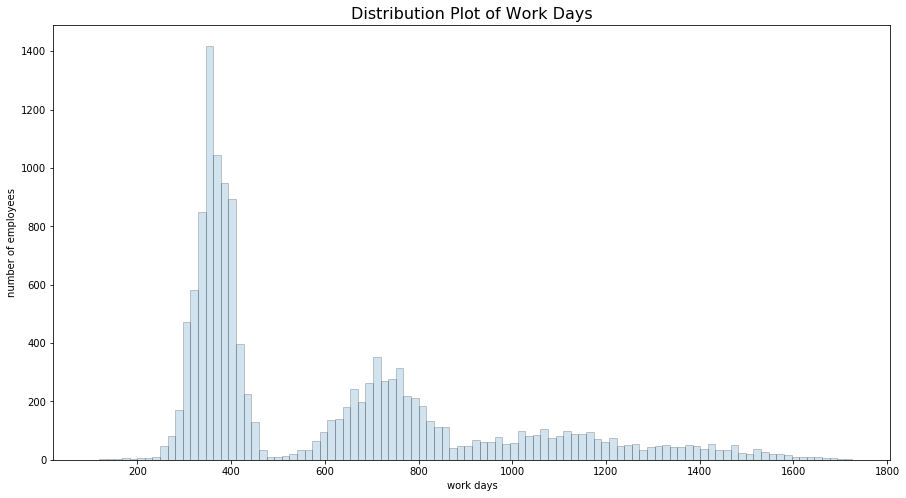

In [16]:
work_days = (df_quit['quit_date'] - df_quit['join_date']).dt.days

fig, ax = plt.subplots(figsize = (15, 8))
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

sns.distplot(work_days, ax = ax, kde = False, bins = 100, hist_kws = hist_kws)
ax.set_title('Distribution Plot of Work Days', fontsize = 16)
ax.set_xlabel('work days')
ax.set_ylabel('number of employees')

Text(0, 0.5, 'number of employees')

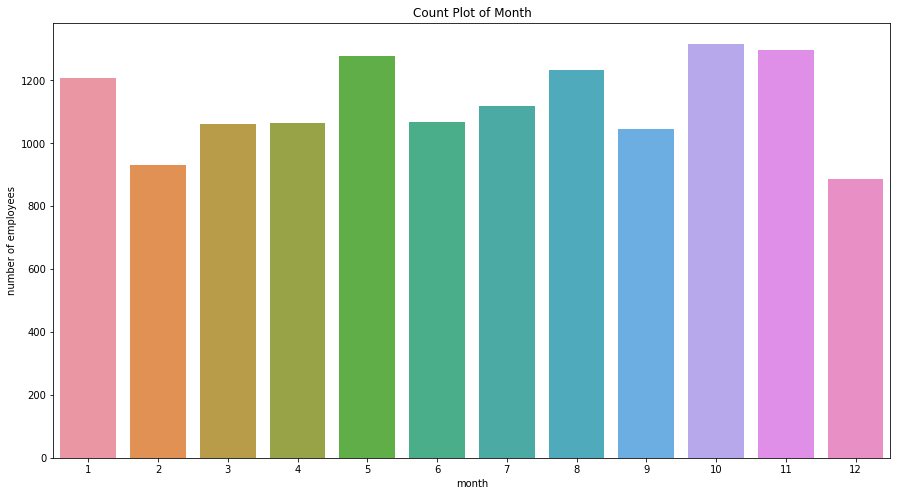

In [18]:
quit_month = df_quit['quit_date'].dt.month

fig, ax = plt.subplots(figsize = (15, 8))

sns.countplot(quit_month, ax = ax)
ax.set_title('Count Plot of Month')
ax.set_xlabel('month')
ax.set_ylabel('number of employees')

#### 1. There are peaks around each employee year anniversary.
#### 2. There are peaks at the end of each year and the begining of each year. Make sense, companies have much more money to hire at the beginning of the year.

# Decision Tree

#### Majority of the employees quit within the first 13 months. 
#### Let's create 2 classes of employees: 1. employees that quit within 13 months. 2. employees that don't quit within the first 13 months. 
#### Build a decision tree model.

In [19]:
df['work_days'] = (df['quit_date'] - df['join_date']).dt.days
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,work_days
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0


In [20]:
df['quit'] = np.where(df['work_days'] <= 365+31, 1, 0)
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,work_days,quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0,0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,NaN,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0,0


In [21]:
# sklearn needs transfering categorical value using one-hot encoding, not good using labelcode here
dummies = pd.get_dummies(df[['company_id', 'dept']])
X = pd.concat(objs=[df[['seniority', 'salary']], dummies], axis=1)
y = df['quit']

In [22]:
# split data, 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 1)

In [23]:
# check one hot encoding
X_train.head()

,seniority,salary,company_id_1,company_id_10,company_id_11,company_id_12,company_id_2,company_id_3,company_id_4,company_id_5,company_id_6,company_id_7,company_id_8,company_id_9,dept_customer_service,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales
10153,26,291000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
17053,25,315000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19851,5,70000.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
16944,12,62000.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
16040,25,150000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
# build decision tree model
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [42]:
# evaluate data
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7580623397652139


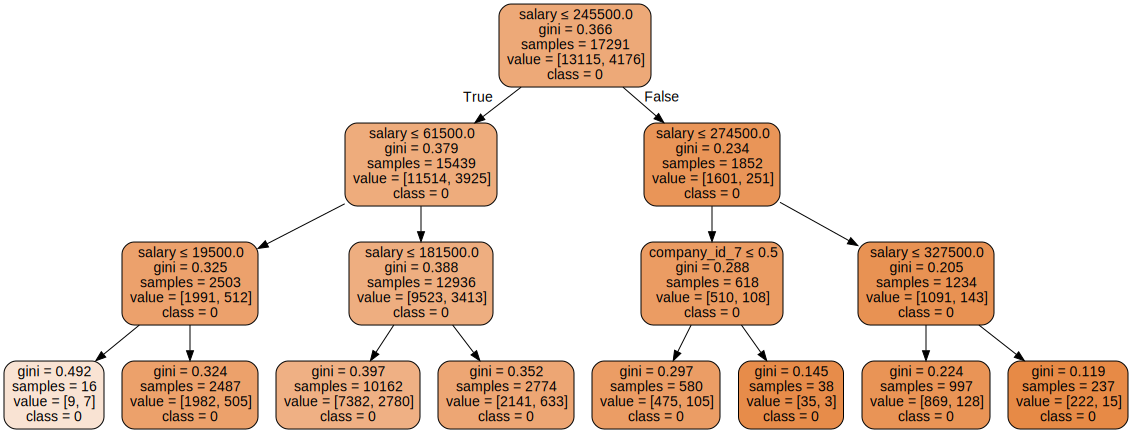

In [43]:
# decision visualization
features = list(X_train.columns)
targets = ['0', '1']
dot_data = tree.export_graphviz(clf, out_file = None, filled = True, rounded = True,
                                special_characters = True, feature_names = features, 
                                class_names = targets)
graph = graphviz.Source(dot_data)
graph

In [28]:
# Feature importance
importance = sorted(zip(features, clf.feature_importances_), key=lambda x:x[1], reverse=True)
for feature, val in importance:
    print('{0:21s} | {1:10f}'.format(feature, val))

salary                |   0.970275
seniority             |   0.020082
company_id_7          |   0.009644
company_id_1          |   0.000000
company_id_10         |   0.000000
company_id_11         |   0.000000
company_id_12         |   0.000000
company_id_2          |   0.000000
company_id_3          |   0.000000
company_id_4          |   0.000000
company_id_5          |   0.000000
company_id_6          |   0.000000
company_id_8          |   0.000000
company_id_9          |   0.000000
dept_customer_service |   0.000000
dept_data_science     |   0.000000
dept_design           |   0.000000
dept_engineer         |   0.000000
dept_marketing        |   0.000000
dept_sales            |   0.000000


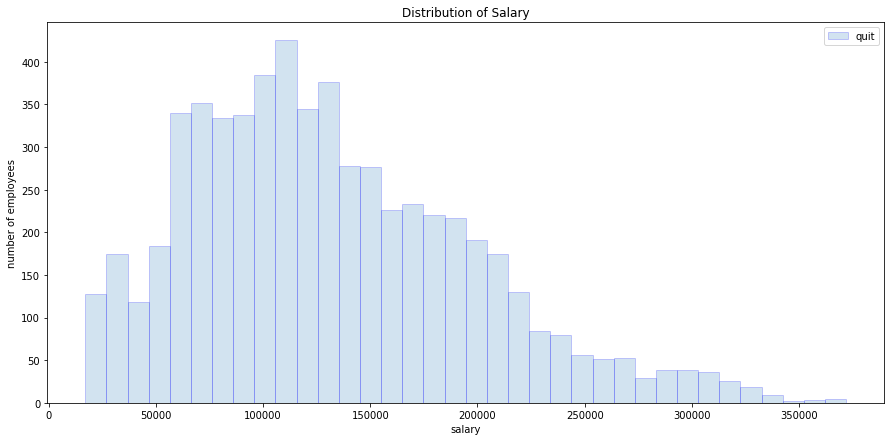

In [33]:
fig, ax = plt.subplots(figsize = (15, 7))
hist_kws={'histtype': 'bar', 'edgecolor':'blue', 'alpha': 0.2}

sns.distplot(df[df['quit'] == 1]['salary'], ax = ax, kde = False, hist_kws=hist_kws, label = 'quit')
ax.set_title('Distribution of Salary')
ax.set_ylabel('number of employees')
ax.legend()

#### 1. Salary is what matters the most. After all, it probably has information about the other variables too. That is, seniority, dept and company impact salary. So salary carries pretty much all the information available.
#### 2. If salary between 61500 and 245500, the employee has higher probability of being an early quitter, otherwise she doesn’t. That means that people who make a lot of money and very little are not likely to quit (“little money” by Silicon Valley standards).

# Conclusion

#### 1. The major findings are that employees quit at year anniversaries or at the beginning of the year. Both cases make sense. Even if you don’t like your current job, you often stay for 1 yr before quitting + you often get stocks after 1 yr so it makes sense to wait. Also, the beginning of the year is well known to be the best time to change job: companies are hiring more and you often want to stay until end of Dec to get the calendar year bonus.
#### 2. Given how important is salary, I would definitely love to have as a variable the salary the employee who quit was offered in the next job. Otherwise, things like: promotions or raises received during the employee tenure would be interesting.
#### 3. Employees with low and high salaries are less likely to quit. Probably because employees with high salaries are happy there and employees with low salaries are not that marketable, so they have a hard time finding a new job.